# Introduction to Data Exploration
## Demo: Titanic Survivals
<br><br>
This demo code will illustrate data exploration techniques using the data about all <a href = "https://en.wikipedia.org/wiki/RMS_Titanic">Titanic</a> passangers, both those that have survived and those that have not survived the tragic and the biggest passanger ship crash in the history (1912).
Please, note, that this are not just numbers, but numbers, associated with real people's destiny!


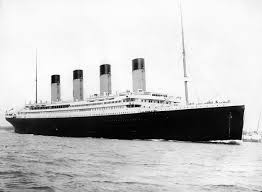

We will implement the following procedure:
1. Prepare the environment by importing the major libraries, which contain modules and functions we will need.
2. Get the available data
3. Explore the data to get an impression of what does it contain.
4. Clean the data, so it can be further analysed

# Environment

In [3]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pip install xlrd
# other utilities
from sklearn import datasets, preprocessing, metrics

Note: you may need to restart the kernel to use updated packages.


# Data Input
In this demo we will use an excel file with the original data. In many other cases we can only find plain text or csv files.

In [4]:
# read the Excel file from your data folder into a data frame
df = pd.read_excel(r'C:\Users\AxiiS\Documents\GitHub\python\notebooks\data\Titanic.xls', index_col=None, na_values=['NA'])

In [5]:
# see the size
df.shape

(1309, 14)

In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
# see which are the attribute labels
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [1]:
# see the first five records
df.head()

NameError: name 'df' is not defined

# Data Cleaning and Preparation

In [9]:
# count the missing values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Delete Rows and Columns

In [10]:
# remove most empty columns, which are not so informative
df = df.drop(['body', 'cabin', 'boat'], axis=1)

In [11]:
df.shape

(1309, 11)

### Replace with Average

In [12]:
# replace the missing age with the average age
mean_age=df.age.mean()
df['age']= df['age'].fillna(mean_age)

In [13]:
# see the current number of data
df.count()


pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest     745
dtype: int64

In [15]:
# fill the missing home destination with 'NA'
df["home.dest"] = df["home.dest"].fillna("NA")
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,C,"Montevideo, Uruguay"


In [16]:
# see the current state of null values
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         1
embarked     2
home.dest    0
dtype: int64

In [17]:
# replace the  missing fare values with the average
mean_fare = df.fare.mean()
mean_fare

33.29547928134557

In [18]:
df['fare'] = df['fare'].fillna(mean_fare)

### Replace with Mode

In [19]:
# find the most used 'embarked' value
mode_emb = df.embarked.mode()
mode_emb

0    S
Name: embarked, dtype: object

In [20]:
# replace the missing embarked values with the mode
df['embarked']=df['embarked'].fillna('S')

### Transform Categorical Data into Numeric

As a preprocessing, we will convert the strings into integer keys, making it easier for the  algorithms to find patterns. 
- “Female” and “Male” are categorical values and will be converted to 0 and 1 respectively
- The “name”, “ticket”, and “home.dest” columns consist of non-categorical string values, which are difficult to use in our algorithm, so we will drop them from the data set

In [21]:
# define a function for transformation
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df

In [22]:
# call the transformation function
dfp = preprocessor(df)

In [23]:
dfp.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.000000,0,0,211.3375,2
1,1,1,1,0.916700,1,2,151.5500,2
2,1,0,0,2.000000,1,2,151.5500,2
3,1,0,1,30.000000,1,2,151.5500,2
4,1,0,0,25.000000,1,2,151.5500,2
5,1,1,1,48.000000,0,0,26.5500,2
6,1,1,0,63.000000,1,0,77.9583,2
7,1,0,1,39.000000,0,0,0.0000,2
8,1,1,0,53.000000,2,0,51.4792,2
9,1,0,1,71.000000,0,0,49.5042,0


In [24]:
dfp.shape

(1309, 8)

In [ ]:
# dfp = np.nan_to_num(dfp)

In [25]:
np.all(np.isfinite(dfp))

True

In [26]:
np.any(np.isnan(dfp))

False

# Data Exploration

In [27]:
# see the types of the attributes
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
embarked      object
home.dest     object
dtype: object

In [28]:
# get some insights of the value scope
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


### Measures of Central Tendency

In [29]:
# mean
# np.mean(df[['age']])
np.mean(df.age)


29.881134512428297

In [30]:
# the average in groups
df.groupby("pclass")["age"].mean()

pclass
1    38.039569
2    29.528333
3    26.302223
Name: age, dtype: float64

In [31]:
# weighted mean
x=np.average(df.age, weights=df.pclass)

In [32]:
# trimmed mean - ignores the 10% extream values from both ends (deciles)
from scipy import stats as st
st.trim_mean(df.age, 0.1)

29.37868291398345

### Measures of Variability

In [33]:
# standard deviation
df.age.std()

12.883199043445334

In [34]:
# quantiles
df.age.quantile(0.75) - df.age.quantile(0.25)

13.0

In [35]:
# quantiles
df.age.quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05     7.400000
0.25    22.000000
0.50    29.881135
0.75    35.000000
0.95    55.000000
Name: age, dtype: float64

## Plotting

### Box Plot

<Axes: >

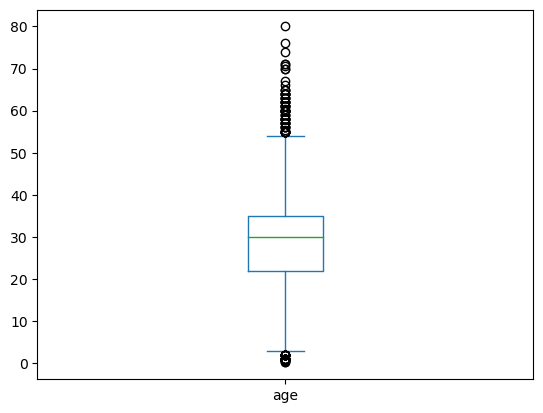

In [36]:
# box plot
# here we see the median25th and 75th percentiles, the range, and the outliers
df.age.plot.box()

<Axes: title={'center': 'age'}, xlabel='embarked'>

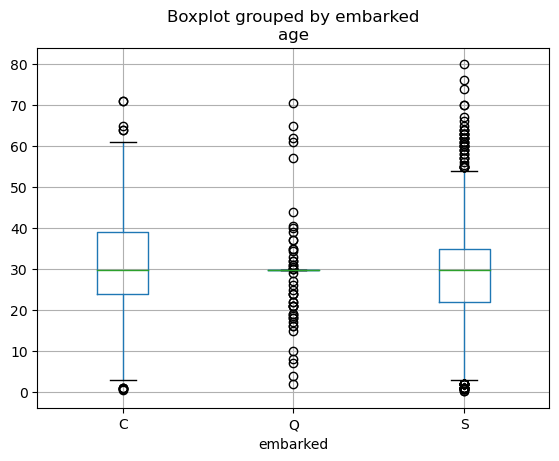

In [37]:
# categorical data vs numeric data
df.boxplot(by='embarked', column='age')

### Histogram

<Axes: ylabel='Frequency'>

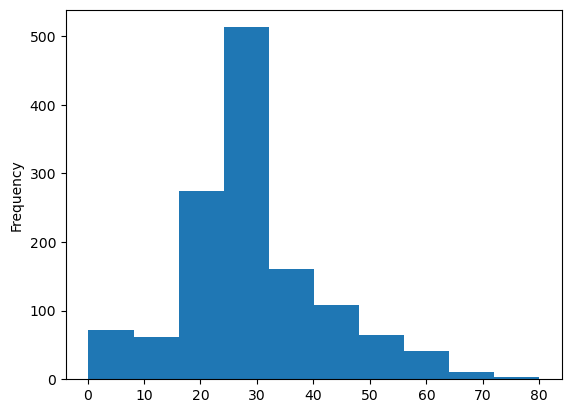

In [38]:
df.age.plot.hist()

### Density Plot

<Axes: ylabel='Density'>

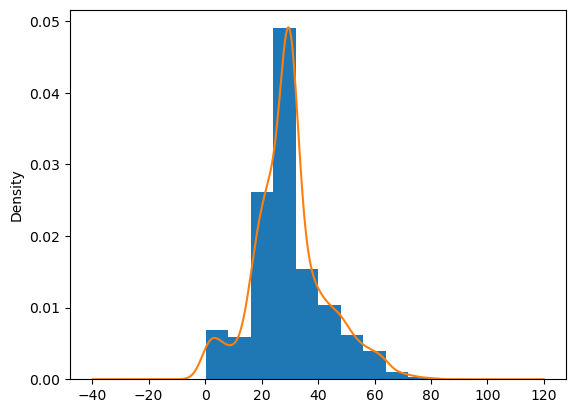

In [39]:
# parameters can control the smoothness
df.age.plot.hist(density=True)
df.age.plot.density()

### Bar Charts

<Axes: xlabel='embarked'>

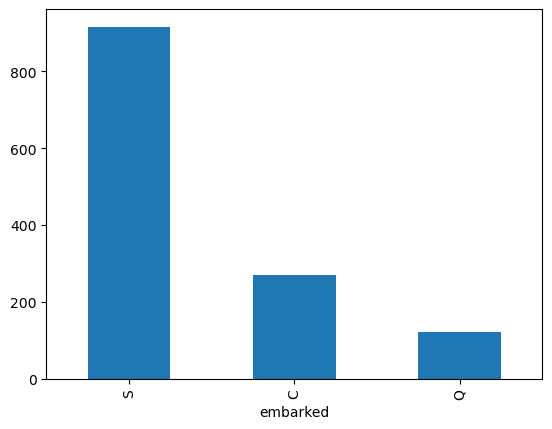

In [40]:
# Non-numeric data is not included in the statistic above, but can be plotted
df['embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='survived'>

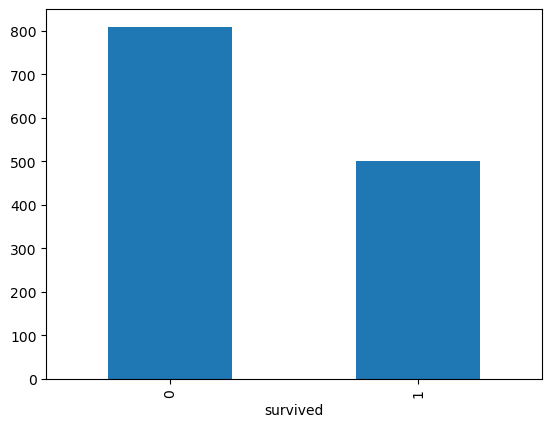

In [41]:
# Numeric data can also be plotted 
df['survived'].value_counts().plot(kind='bar')

### Scatterplot

<Axes: xlabel='fare', ylabel='age'>

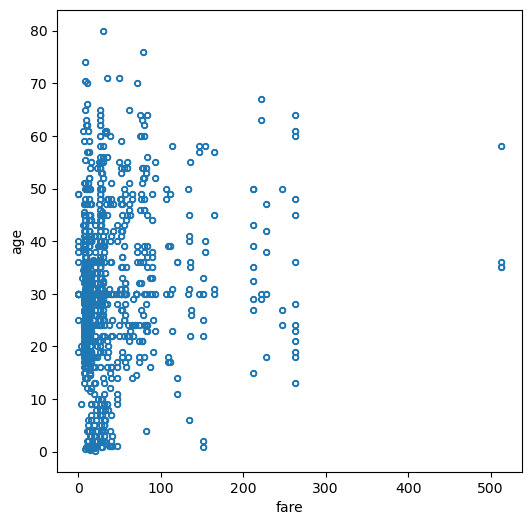

In [42]:
df.plot.scatter(x='fare', y='age', figsize=(6, 6), marker = '$\u25EF$')

<Axes: xlabel='age', ylabel='sibsp'>

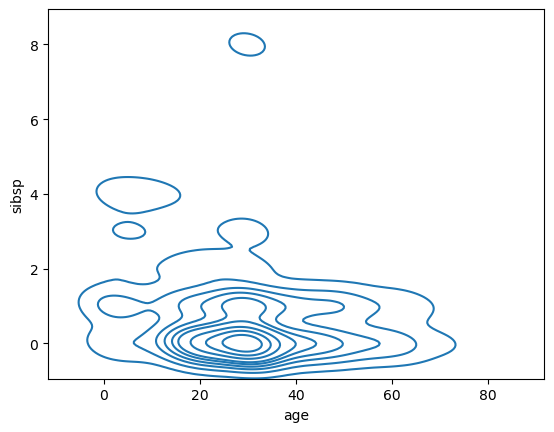

In [48]:
# a topographical map, presents the density of points of two variables
#sns.kdeplot(df.age, df.sibsp)
sns.kdeplot(data = df, x='age',y='sibsp')

### Violin Plot

<Axes: xlabel='embarked', ylabel='age'>

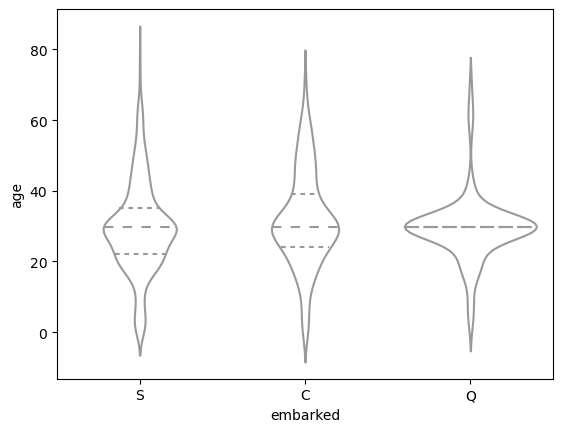

In [49]:
# enhancement to the boxplot
# shos the dencity estimates
#sns.violinplot(df.embarked, df.age, inner="quartile", color="white")
sns.violinplot(data = df, x='embarked', y='age',inner="quartile",color="white")

### Contour Plot

## Correlation

In [50]:
# Correlation matrix
corrmat = df.corr()
corrmat

ValueError: could not convert string to float: 'Allen, Miss. Elisabeth Walton'

In [47]:
sns.heatmap(corrmat, annot=True)
plt.show()

NameError: name 'corrmat' is not defined

Incredibly low % of survivals: 38% <br>
Titanic was only carrying 20 lifeboats for 1317 passengers and 885 crew members aboard!

#### Social status

In [ ]:
# Did the social class matter?
social = df.groupby('pclass').mean()
social

In [ ]:
# plot
social['survived'].plot.bar()

## Further Exploration

#### Gender

In [ ]:
# Did the gender matter?
gender = df.groupby('sex').mean()
gender

In [ ]:
# plot
gender['survived'].plot.bar()

In [ ]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).mean()
gender_by_class

In [ ]:
# plot
gender_by_class['survived'].plot.bar()

#### Age

In [ ]:
# Did the age matter?
bins = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, bins))]).count()
age

In [ ]:
# average per range
age_by_gender=df.groupby([(pd.cut(df.age, bins)), 'sex']).mean()
age_by_gender

In [ ]:
# plot
age_by_gender['survived'].plot.bar()

# Train a model
1. Split the data into input and output
2. Split the data into train and test sets

In [ ]:
# Split the data into input and output
X = dfp.drop(['survived'], axis=1).values
y = dfp['survived'].values

In [ ]:
X[-1]

In [ ]:
y

In [ ]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Select a method
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
# Train a model
dt.fit (X_train, y_train)

In [ ]:
# Validate the model
dt.score (X_test, y_test)

The resulting value is the model accuracy. It means that the model correctly predicted the survival of this % of the test set. Not bad for start!

In [ ]:
# Try another method
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (X_train, y_train)
rf.score (X_test, y_test)

In [ ]:
# Try another method
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (X_train, y_train)
gb.score (X_test, y_test)

In [ ]:
# Try another method
import sklearn.ensemble as ske
# from utilities import visualize_classifier
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

### Use the model to predict
Once the model is trained we can use it to predict the survival of passengers in the test data set, and compare these to the known survival of each passenger using the original dataset.


#### Evaluate the performance with the test data

In [ ]:
# Test the classifier with the test input data
prediction = eclf.predict(X_test)
prediction

In [ ]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))

In [ ]:
prediction = eclf.predict(X_test)
prediction

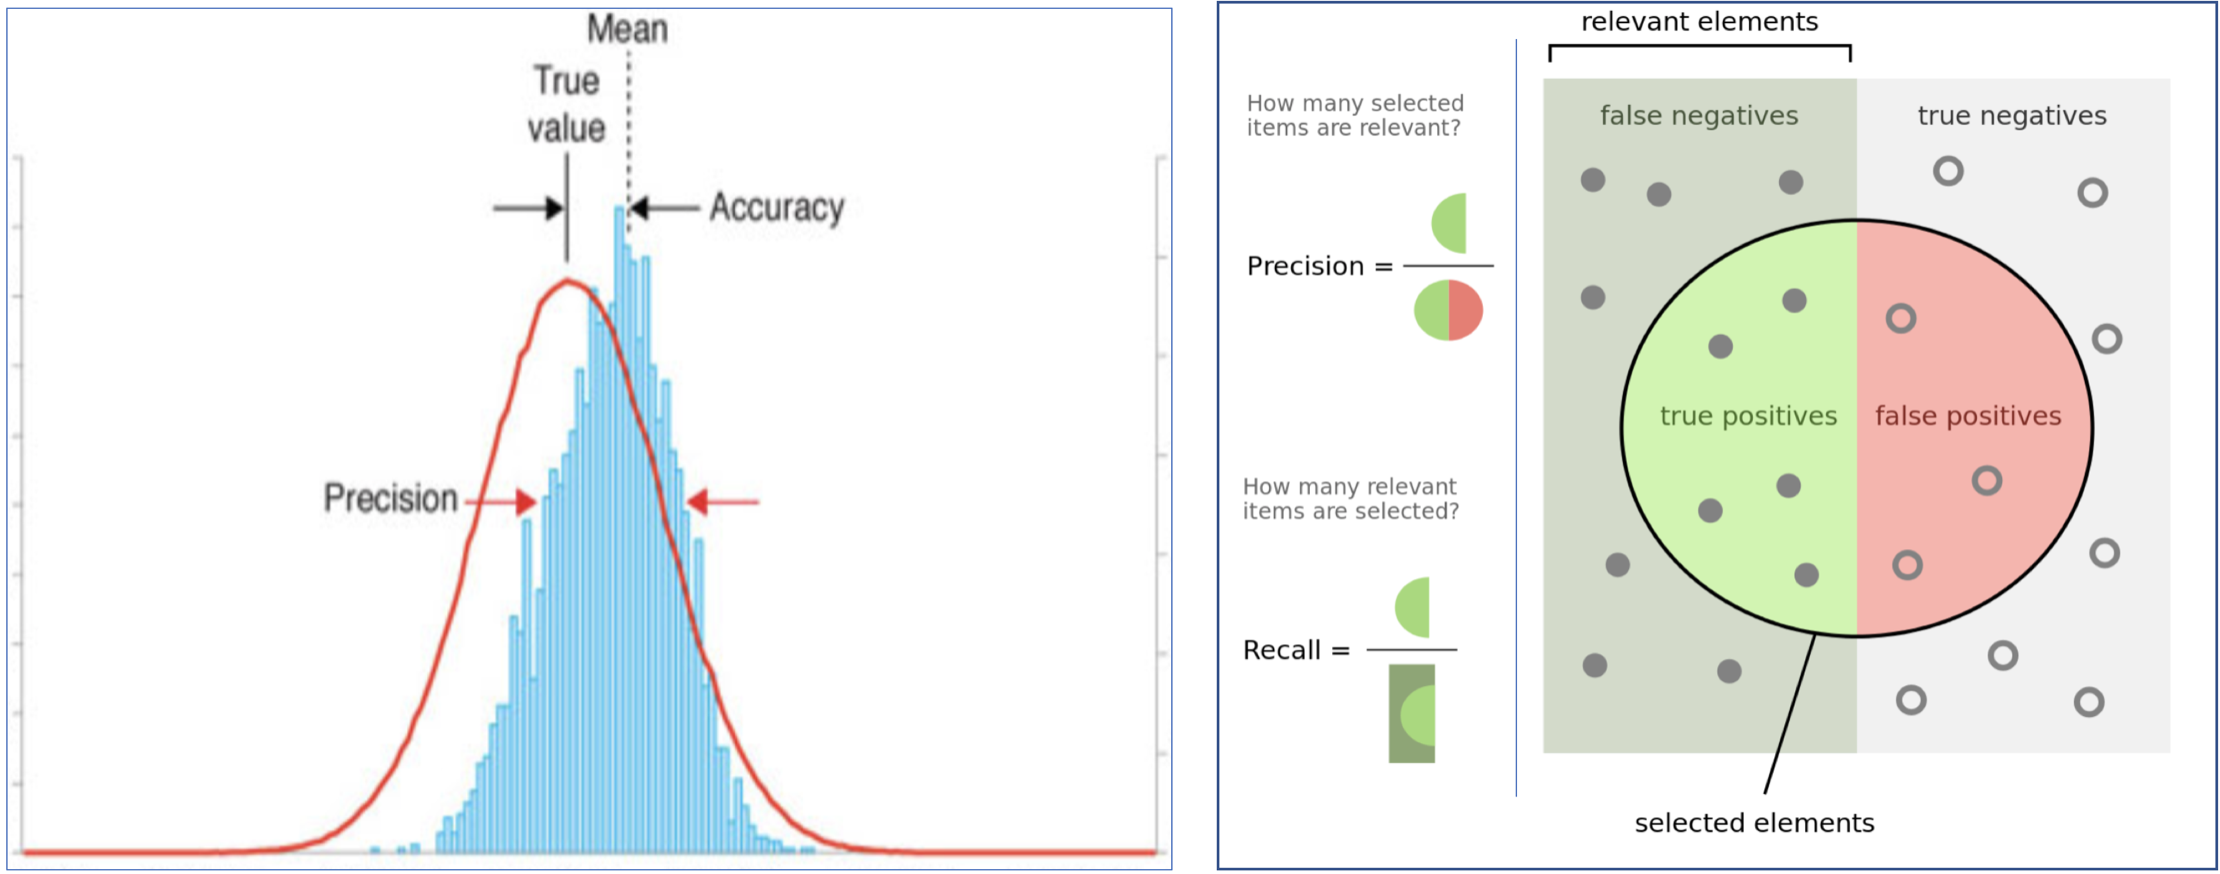

#### Evaluate the performance with new data

In [ ]:
list(X_test)

In [ ]:
# Enter a new data set for a person
my_set1 = ([[1,0,29.00,0,0,211.3375,0]])
# my_set2 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])
# my_set3 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])

In [ ]:
prediction = eclf.predict(my_set1)
prediction

## Reference
https://www.kaggle.com/c/titanic/data <br>
https://blog.socialcops.com/technology/data-science/machine-learning-python/<br>
https://www.youtube.com/watch?v=siEPqQsPLKA